In [3]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import html5lib
from selenium import webdriver
from selenium.webdriver.chrome.options import Options
from functions import *

In [4]:
pd.options.mode.chained_assignment = None 
driver = webdriver.Chrome(options=Options())
driver.get("https://understat.com/team/Real_Madrid/2022")
html = driver.page_source

In [5]:
data = pd.read_html(html)
situations_data = data[0]
situations_data

,№,Situation,Sh,G,ShA,GA,xG,xGA,xGD,xG/Sh,xGA/Sh
0,1,Open play,303,31,185,11,36.70+5.70,15.46+4.46,21.24,0.12,0.08
1,2,From corner,58,6,44,1,4.44-1.56,3.33+2.33,1.11,0.08,0.08
2,3,Set piece,25,1,13,2,2.17+1.17,0.79-1.21,1.38,0.09,0.06
3,4,Direct Freekick,19,2,5,0,1.46-0.54,0.41+0.41,1.05,0.08,0.08
4,5,Penalty,10,7,4,4,7.43+0.43,2.97-1.03,4.46,0.74,0.74


In [6]:
situations_data.xG = situations_data.xG.apply(lambda xG: correctValue(xG))
situations_data.xGA = situations_data.xGA.apply(lambda xGA: correctValue(xGA))
situations_data

,№,Situation,Sh,G,ShA,GA,xG,xGA,xGD,xG/Sh,xGA/Sh
0,1,Open play,303,31,185,11,36.70,15.46,21.24,0.12,0.08
1,2,From corner,58,6,44,1,4.44,3.33,1.11,0.08,0.08
2,3,Set piece,25,1,13,2,2.17,0.79,1.38,0.09,0.06
3,4,Direct Freekick,19,2,5,0,1.46,0.41,1.05,0.08,0.08
4,5,Penalty,10,7,4,4,7.43,2.97,4.46,0.74,0.74


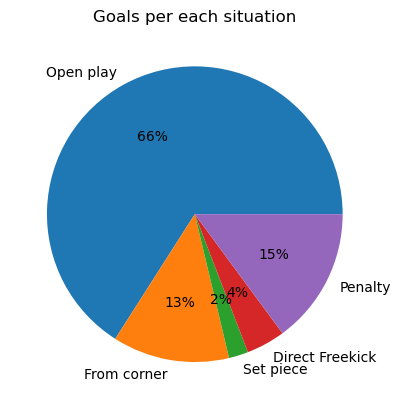

In [7]:
plt.pie(situations_data.G,labels=situations_data.Situation,autopct='%1.0f%%')
plt.title("Goals per each situation")
plt.show()

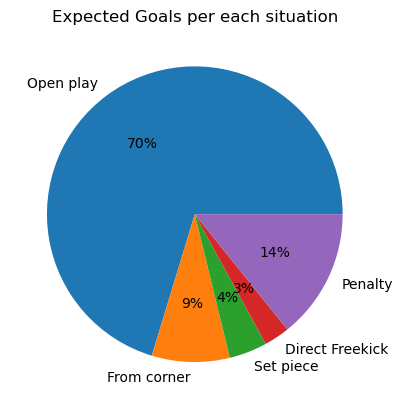

In [8]:
plt.pie(situations_data.xG,labels=situations_data.Situation,autopct='%1.0f%%')
plt.title("Expected Goals per each situation")
plt.show()

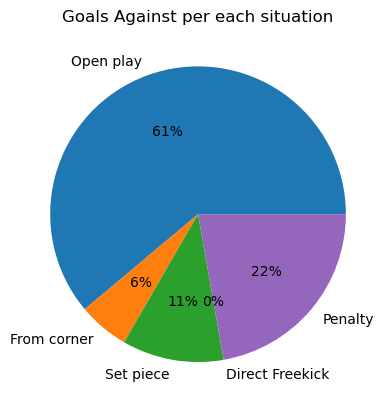

In [9]:
plt.pie(situations_data.GA,labels=situations_data.Situation,autopct='%1.0f%%')
plt.title("Goals Against per each situation")
plt.show()

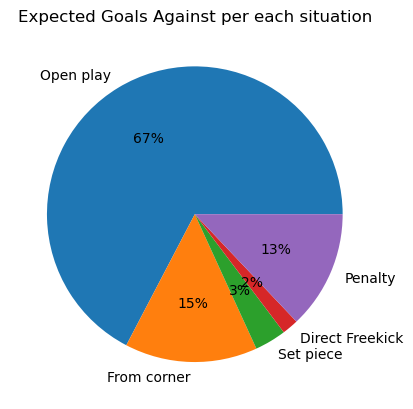

In [10]:
plt.pie(situations_data.xGA,labels=situations_data.Situation,autopct='%1.0f%%')
plt.title("Expected Goals Against per each situation")
plt.show()

In [13]:
players_data = pd.DataFrame(data[1]).dropna()
players_data.xG = players_data.xG.apply(lambda xG: correctValue(xG))
players_data.xA = players_data.xA.apply(lambda xA: correctValue(xA))
players_data.xG = players_data.xG.astype(float)
players_data.xA = players_data.xA.astype(float)
players_data["Efficiency"] = players_data.G / players_data.xG
players_data

,№,Player,Pos,Apps,Min,G,A,Sh90,KP90,xG,xA,xG90,xA90,Efficiency
0,1.0,Karim Benzema,F,15.0,1316.0,11,3,4.79,2.26,15.22,4.03,1.04,0.28,0.722733
1,2.0,Federico Valverde,F M,24.0,1864.0,7,2,2.46,1.59,2.65,4.15,0.13,0.20,2.641509
2,3.0,Vinícius Júnior,F M,23.0,2045.0,7,4,2.42,1.85,8.87,5.54,0.39,0.24,0.789177
3,4.0,Marco Asensio,F,18.0,646.0,4,3,3.76,2.09,3.91,1.75,0.55,0.24,1.023018
4,5.0,Luka Modric,M,22.0,1280.0,4,3,1.69,2.11,3.24,4.13,0.23,0.29,1.234568
5,6.0,Rodrygo,F,21.0,1456.0,4,5,3.65,1.85,8.62,5.25,0.53,0.32,0.464037
6,7.0,Eder Militão,D,20.0,1574.0,3,0,0.86,0.17,1.77,0.13,0.10,0.01,1.694915
7,8.0,Lucas Vázquez,D,12.0,488.0,2,0,1.29,2.03,0.91,0.75,0.17,0.14,2.197802
8,9.0,Toni Kroos,M,19.0,1389.0,2,2,1.10,2.20,0.65,3.02,0.04,0.20,3.076923
9,10.0,David Alaba,D,19.0,1546.0,1,3,0.70,0.93,0.97,0.88,0.06,0.05,1.030928


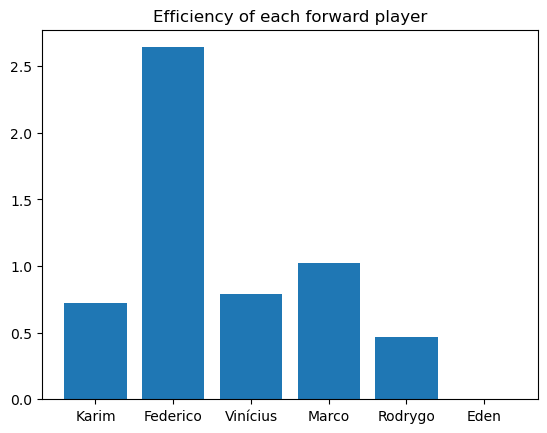

In [14]:
forward_players = players_data[players_data.Pos.str.contains('F')]
forward_players.Player = forward_players.Player.apply(lambda x: x.split()[0])
plt.bar(forward_players.Player,forward_players.Efficiency)
plt.title("Efficiency of each forward player")
plt.show()